In [39]:
import h5py
import numpy as np
import pandas as pd 

import fastdtw
import scipy.spatial.distance as sd

from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

GRID_SIZE = 0.06
LOWER_LAMBDA = 6472.5
UPPER_LAMBDA = 6740
PLOT_MASK = range(1475,1550)

In [40]:
hf_spec = h5py.File("/home/praveen/Documents/Research Data/resampled_emission_spectra.h5", "r")
hf_grid = h5py.File("/home/praveen/Documents/Research Data/wl_grid.h5", "r")

wl_grid = np.array(hf_grid["wl_grid"])
df = pd.DataFrame(hf_spec["spectra"])

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [42]:
hf_spec.close()
hf_grid.close()

In [225]:
df_masked = df.loc[:,PLOT_MASK]
df_masked_np = df_masked.to_numpy()

In [44]:
df_masked_np

array([[0.7912324 , 0.79911628, 0.7985126 , ..., 0.79986329, 0.83588461,
        0.84283663],
       [1.01678956, 1.03371707, 1.03914097, ..., 1.03687289, 1.03514419,
        1.02727585],
       [1.06841943, 1.06441767, 1.05954256, ..., 1.0777528 , 1.08255897,
        1.07534706],
       ...,
       [0.77445974, 0.79734068, 0.84299583, ..., 0.80371531, 0.81053699,
        0.7972178 ],
       [0.79396047, 0.78979645, 0.74888732, ..., 0.77299214, 0.78101725,
        0.80420843],
       [0.88686549, 0.85203514, 0.88171964, ..., 0.87436063, 0.87511307,
        0.8841142 ]])

In [45]:
def my_fastdtw(spec1, spec2):
    return fastdtw.fastdtw(spec1, spec2)[0]

In [46]:
distance_matrix = sd.pdist(df_masked_np, my_fastdtw)

In [121]:
distance_matrix

array([30.13772897, 39.35652421, 10.32888257, ...,  1.38817553,
        2.69484773,  3.4286624 ])

In [122]:
distance_matrix_square_form = sd.squareform(distance_matrix)

In [123]:
distance_matrix_square_form

array([[ 0.        , 30.13772897, 39.35652421, ...,  1.64667516,
         1.3882707 ,  4.04934201],
       [30.13772897,  0.        ,  7.89733018, ..., 26.76797372,
        29.22981255, 20.14688527],
       [39.35652421,  7.89733018,  0.        , ..., 35.98676896,
        38.44860779, 29.81040761],
       ...,
       [ 1.64667516, 26.76797372, 35.98676896, ...,  0.        ,
         1.38817553,  2.69484773],
       [ 1.3882707 , 29.22981255, 38.44860779, ...,  1.38817553,
         0.        ,  3.4286624 ],
       [ 4.04934201, 20.14688527, 29.81040761, ...,  2.69484773,
         3.4286624 ,  0.        ]])

In [124]:
def distance_cost_plot(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();

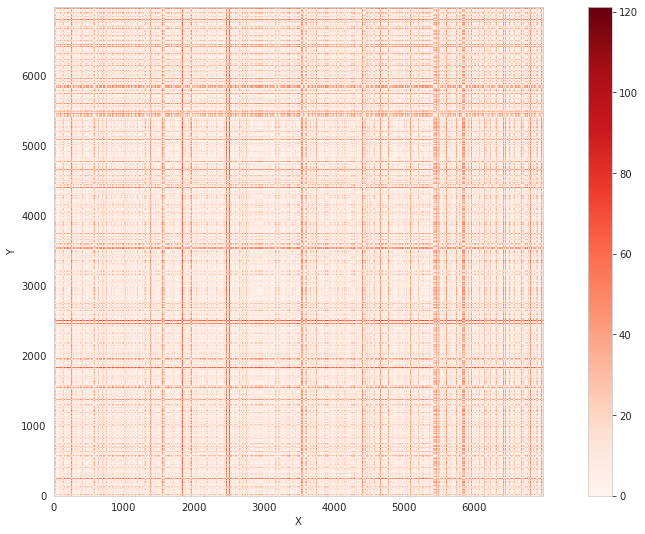

In [51]:
distance_cost_plot(distance_matrix_square_form)

In [125]:
agglom = AgglomerativeClustering(n_clusters = 10, linkage = 'complete')
agglom.fit(distance_matrix_square_form)
agglom.labels_

/home/praveen/anaconda3/envs/masters-thesis/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([8, 2, 7, ..., 8, 8, 1])

In [226]:
df_masked.columns = wl_grid[PLOT_MASK]

In [227]:
df_masked

,6561.00,6561.06,6561.12,6561.18,6561.24,6561.30,6561.36,6561.42,6561.48,6561.54,...,6564.90,6564.96,6565.02,6565.08,6565.14,6565.20,6565.26,6565.32,6565.38,6565.44
0,0.791232,0.799116,0.798513,0.789936,0.770570,0.747840,0.750200,0.778579,0.805557,0.818449,...,0.798908,0.787328,0.786379,0.795869,0.800229,0.788336,0.781923,0.799863,0.835885,0.842837
1,1.016790,1.033717,1.039141,1.053989,1.071330,1.068635,1.053506,1.034933,1.029725,1.013231,...,1.059578,1.066814,1.051114,1.045202,1.061199,1.052639,1.056661,1.036873,1.035144,1.027276
2,1.068419,1.064418,1.059543,1.045539,1.045996,1.074062,1.101389,1.097221,1.074829,1.057252,...,0.956748,0.948488,0.951768,0.963281,0.994941,1.033656,1.060059,1.077753,1.082559,1.075347
3,0.854523,0.876311,0.909512,0.926363,0.935885,0.954685,0.921646,0.926053,0.934858,0.936088,...,0.945860,0.952184,0.955382,0.951590,0.953749,0.961062,0.973229,0.988212,0.976314,0.969340
4,0.958085,0.961354,0.958334,0.960897,0.960540,0.954966,0.951380,0.939908,0.923267,0.903025,...,0.920758,0.925107,0.934469,0.943445,0.949600,0.948857,0.944906,0.948702,0.955197,0.953001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6972,0.979460,0.979947,0.992501,0.989477,0.973512,0.967220,0.973822,0.969585,0.959854,0.962128,...,0.983729,0.992850,1.004913,1.021605,1.029605,1.020435,1.005490,1.008604,1.042151,1.070625
6973,0.863882,0.848471,0.843037,0.840001,0.837331,0.834296,0.837569,0.835818,0.814332,0.811529,...,0.881433,0.880143,0.875100,0.903360,0.913392,0.900255,0.892303,0.890207,0.885781,0.886356
6974,0.774460,0.797341,0.842996,0.851695,0.832578,0.821339,0.809885,0.813631,0.819904,0.802070,...,0.771875,0.759515,0.782272,0.813831,0.816796,0.807716,0.802482,0.803715,0.810537,0.797218
6975,0.793960,0.789796,0.748887,0.756238,0.757121,0.718977,0.737649,0.747256,0.735109,0.722338,...,0.798911,0.804237,0.811593,0.803251,0.802970,0.821207,0.803905,0.772992,0.781017,0.804208


In [228]:
df_masked["label"] = pd.Series(agglom.labels_, index = df_masked.index)

In [229]:
df_masked

,6561.00000000059,6561.060000000591,6561.120000000591,6561.1800000005915,6561.240000000592,6561.300000000592,6561.360000000593,6561.420000000593,6561.4800000005935,6561.540000000594,...,6564.960000000617,6565.020000000617,6565.0800000006175,6565.140000000618,6565.200000000618,6565.260000000619,6565.320000000619,6565.3800000006195,6565.44000000062,label
0,0.791232,0.799116,0.798513,0.789936,0.770570,0.747840,0.750200,0.778579,0.805557,0.818449,...,0.787328,0.786379,0.795869,0.800229,0.788336,0.781923,0.799863,0.835885,0.842837,8
1,1.016790,1.033717,1.039141,1.053989,1.071330,1.068635,1.053506,1.034933,1.029725,1.013231,...,1.066814,1.051114,1.045202,1.061199,1.052639,1.056661,1.036873,1.035144,1.027276,2
2,1.068419,1.064418,1.059543,1.045539,1.045996,1.074062,1.101389,1.097221,1.074829,1.057252,...,0.948488,0.951768,0.963281,0.994941,1.033656,1.060059,1.077753,1.082559,1.075347,7
3,0.854523,0.876311,0.909512,0.926363,0.935885,0.954685,0.921646,0.926053,0.934858,0.936088,...,0.952184,0.955382,0.951590,0.953749,0.961062,0.973229,0.988212,0.976314,0.969340,1
4,0.958085,0.961354,0.958334,0.960897,0.960540,0.954966,0.951380,0.939908,0.923267,0.903025,...,0.925107,0.934469,0.943445,0.949600,0.948857,0.944906,0.948702,0.955197,0.953001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6972,0.979460,0.979947,0.992501,0.989477,0.973512,0.967220,0.973822,0.969585,0.959854,0.962128,...,0.992850,1.004913,1.021605,1.029605,1.020435,1.005490,1.008604,1.042151,1.070625,1
6973,0.863882,0.848471,0.843037,0.840001,0.837331,0.834296,0.837569,0.835818,0.814332,0.811529,...,0.880143,0.875100,0.903360,0.913392,0.900255,0.892303,0.890207,0.885781,0.886356,1
6974,0.774460,0.797341,0.842996,0.851695,0.832578,0.821339,0.809885,0.813631,0.819904,0.802070,...,0.759515,0.782272,0.813831,0.816796,0.807716,0.802482,0.803715,0.810537,0.797218,8
6975,0.793960,0.789796,0.748887,0.756238,0.757121,0.718977,0.737649,0.747256,0.735109,0.722338,...,0.804237,0.811593,0.803251,0.802970,0.821207,0.803905,0.772992,0.781017,0.804208,8


In [230]:
df_sobject_ids = pd.read_csv("/home/praveen/Documents/Research Data/best_emission_candidates.csv", header=None)

In [231]:
df_sobject_ids.columns = ["sobject_id"]

In [232]:
df_masked = pd.concat([df_masked, df_sobject_ids], axis=1)

In [233]:
df_masked.describe()

,6561.00000000059,6561.060000000591,6561.120000000591,6561.1800000005915,6561.240000000592,6561.300000000592,6561.360000000593,6561.420000000593,6561.4800000005935,6561.540000000594,...,6565.020000000617,6565.0800000006175,6565.140000000618,6565.200000000618,6565.260000000619,6565.320000000619,6565.3800000006195,6565.44000000062,label,sobject_id
count,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,...,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6977.000000,6.977000e+03
mean,0.904588,0.906002,0.905649,0.905211,0.905907,0.905614,0.904135,0.901653,0.898647,0.895590,...,0.899959,0.902821,0.906731,0.910561,0.913475,0.915050,0.914227,0.910940,3.317328,1.616289e+14
std,0.133512,0.142865,0.139936,0.131953,0.140749,0.148470,0.148177,0.144318,0.145141,0.148671,...,0.110225,0.105232,0.104657,0.103950,0.103511,0.102874,0.101552,0.098488,3.175970,1.397541e+13
min,0.527667,0.517830,0.529720,0.534370,0.534563,0.520993,0.491913,0.466548,0.462708,0.471737,...,0.454815,0.459259,0.472829,0.489785,0.498759,0.497193,0.497910,0.510483,0.000000,1.311160e+14
25%,0.812355,0.811005,0.809272,0.805143,0.802104,0.797857,0.794502,0.789931,0.786138,0.779595,...,0.826380,0.829562,0.832342,0.835580,0.838515,0.839928,0.842135,0.842926,1.000000,1.504290e+14
50%,0.902828,0.905016,0.905128,0.905601,0.905044,0.903027,0.900594,0.896900,0.893057,0.889257,...,0.901606,0.907973,0.914628,0.915276,0.915382,0.915226,0.913011,0.910536,1.000000,1.606020e+14
75%,0.994714,0.998298,1.000629,1.002678,1.003761,1.004477,1.004483,1.006402,1.004958,1.003147,...,0.974744,0.977830,0.981786,0.988399,0.989596,0.987792,0.982393,0.974352,8.000000,1.705170e+14
max,4.493397,6.576160,6.203987,3.265955,4.704729,5.226535,4.510861,2.915056,2.113648,2.320027,...,3.561712,2.617017,2.612042,2.438605,2.115408,1.800835,1.967850,2.113697,9.000000,1.902250e+14


In [234]:
cols = df_masked.columns.tolist()

In [235]:
cols = cols[-1:] + cols[:-1]

In [236]:
df_masked = df_masked[cols]

In [237]:
df_masked.head()

,sobject_id,6561.00000000059,6561.060000000591,6561.120000000591,6561.1800000005915,6561.240000000592,6561.300000000592,6561.360000000593,6561.420000000593,6561.4800000005935,...,6564.960000000617,6565.020000000617,6565.0800000006175,6565.140000000618,6565.200000000618,6565.260000000619,6565.320000000619,6565.3800000006195,6565.44000000062,label
0,131116000501262,0.791232,0.799116,0.798513,0.789936,0.770570,0.747840,0.750200,0.778579,0.805557,...,0.787328,0.786379,0.795869,0.800229,0.788336,0.781923,0.799863,0.835885,0.842837,8
1,131116001001379,1.016790,1.033717,1.039141,1.053989,1.071330,1.068635,1.053506,1.034933,1.029725,...,1.066814,1.051114,1.045202,1.061199,1.052639,1.056661,1.036873,1.035144,1.027276,2
2,131118002401234,1.068419,1.064418,1.059543,1.045539,1.045996,1.074062,1.101389,1.097221,1.074829,...,0.948488,0.951768,0.963281,0.994941,1.033656,1.060059,1.077753,1.082559,1.075347,7
3,131118002401396,0.854523,0.876311,0.909512,0.926363,0.935885,0.954685,0.921646,0.926053,0.934858,...,0.952184,0.955382,0.951590,0.953749,0.961062,0.973229,0.988212,0.976314,0.969340,1
4,131118002901052,0.958085,0.961354,0.958334,0.960897,0.960540,0.954966,0.951380,0.939908,0.923267,...,0.925107,0.934469,0.943445,0.949600,0.948857,0.944906,0.948702,0.955197,0.953001,1


In [238]:
df_masked["label"].value_counts()

1    3978
8    2041
2     556
7     162
3     127
0      76
6      25
5       9
4       2
9       1
Name: label, dtype: int64

In [195]:
df_masked_label = df_masked.loc[df_masked["label"]==7]

In [197]:
print(df_masked_label.index)

Int64Index([   2,   16,   26,   30,   45,   46,   47,   69,  128,  189,
            ...
            6854, 6861, 6868, 6908, 6914, 6921, 6939, 6953, 6958, 6959],
           dtype='int64', length=162)


<AxesSubplot:xlabel='Wavelength ($\\mathrm{\\AA}$)', ylabel='Flux [norm.]'>

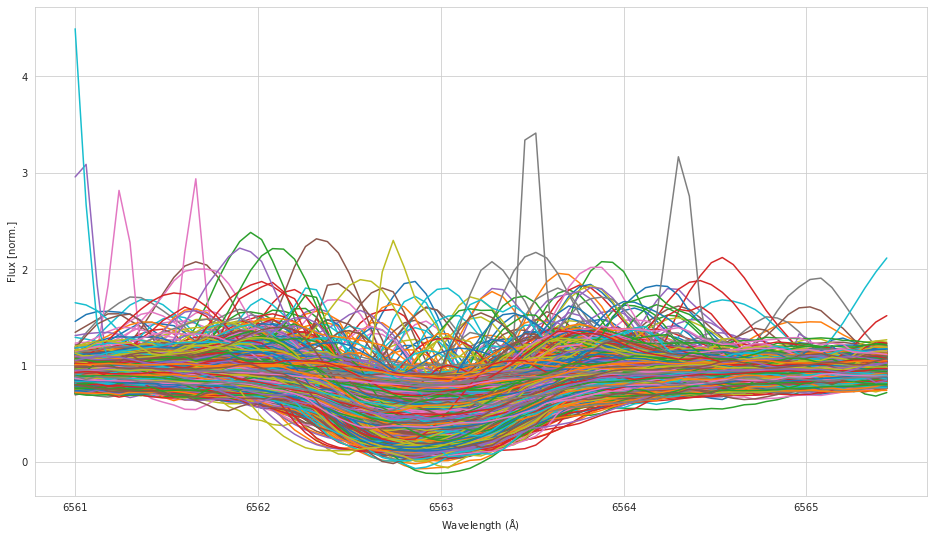

In [244]:
(df_masked.loc[df_masked['label'] == 1].drop(columns=['label','sobject_id']).T).plot(legend=False, xlabel = "Wavelength ($\mathrm{\AA}$)", ylabel= "Flux [norm.]")